In [35]:
# Polynomial Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Last value just for testing
values= [[0,2.1],[1,7.7],[2,13.6],[3,27.2],[4,40.9],[5,61.1],[6,80]]

column=['Y','X']

# Importing the dataset
dataset = pd.DataFrame(values,columns=column)
y = dataset.iloc[:, 1:].values
X = dataset.iloc[:, 0].values

test_row=6
train_idx=np.arange(X.shape[0])!= test_row
test_idx=np.arange(X.shape[0])==test_row
X_train,X_test,y_train,y_test = X[train_idx],X[test_idx],y[train_idx],y[test_idx]

array([[ 2.1],
       [ 7.7],
       [13.6],
       [27.2],
       [40.9],
       [61.1]])

In [55]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), y_train)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

print("PolynominalRegression.md dokumanında anlatıldığı gibi 6 değeri için {} değerinin oluşacağı tahminlenmekte".
      format(lin_reg_2.predict(poly_reg.fit_transform(X_test.reshape(-1, 1)))[0]))

print("-"*50)

print("Polynominal Regresyon Denklemi --> y = {}X + {}X2 + {}".format(lin_reg_2.coef_[0][1],lin_reg_2.coef_[0][2],lin_reg_2.intercept_[0]))


PolynominalRegression.md dokumanında anlatıldığı gibi 6 değeri için [83.62] değerinin oluşacağı tahminlenmekte
--------------------------------------------------
Polynominal Regresyon Denklemi --> y = 2.359285714285717X + 1.8607142857142849X2 + 2.4785714285714313


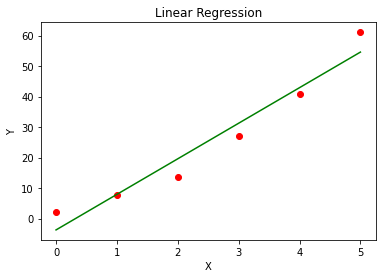

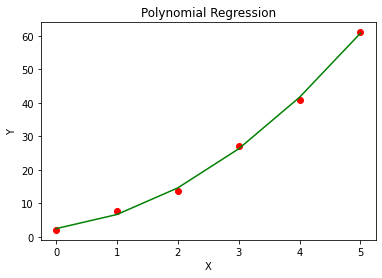

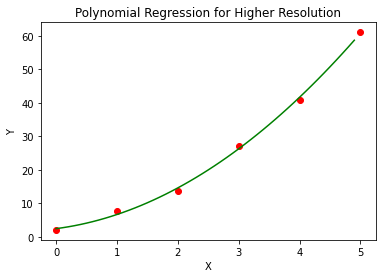

In [59]:
# Visualising the Linear Regression results
plt.scatter(X_train.reshape(-1, 1), y_train, color = 'red')
plt.plot(X_train.reshape(-1, 1), lin_reg.predict(X_train.reshape(-1, 1)), color = 'green')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(X_train.reshape(-1, 1), y_train, color = 'red')
plt.plot(X_train.reshape(-1, 1), lin_reg_2.predict(poly_reg.fit_transform(X_train.reshape(-1, 1))), color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train.reshape(-1, 1), y_train, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green')
plt.title('Polynomial Regression for Higher Resolution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()